In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
from sklearn.datasets import make_regression
X, y =make_regression(n_samples=1000,n_features=2,n_targets=1, noise=0.3)

In [15]:
X

array([[-0.76747537,  1.07474624],
       [-0.2856081 ,  1.18034656],
       [ 1.85588265, -0.16722759],
       ...,
       [-0.82165731, -0.3438159 ],
       [-0.01559315,  0.95753073],
       [ 0.48368747, -0.80965971]])

In [16]:
y

array([ 5.24417327e+01,  6.36478926e+01,  1.10482337e+01,  7.76886953e+00,
        6.22109600e+01, -1.93711101e+01, -3.84348833e+00,  1.11406426e+02,
       -3.34889209e+01,  3.95503741e+01,  9.87362311e+01, -5.88472786e+00,
        7.35904606e+00, -5.08051065e+01,  1.37267158e+01, -4.67544477e+01,
        1.21390684e+02, -4.49898568e+01,  7.51721374e+00, -3.16564231e+01,
       -1.20699195e+01,  6.96027236e+01, -9.81359877e+00, -5.02230363e+01,
        5.79400491e+01,  6.90033615e+01, -1.13258180e+02,  2.69864492e+01,
        4.39735842e+01,  2.33178740e+01, -1.08364816e+02,  7.34343608e+01,
        8.06598032e+00,  4.60507227e+01, -1.54012015e+01, -2.32141010e+01,
       -8.76564023e+01, -3.51700145e+00,  8.13724127e+01,  2.17348467e+01,
        7.07181083e+01, -1.28857643e+01, -7.51533518e+01,  5.30144555e+01,
       -3.42828422e+01,  1.44288672e+01, -2.19750582e+01, -2.40734953e+01,
       -3.43932332e+01,  5.84872563e+01,  8.60935895e+00,  2.46714550e+01,
       -3.14440186e+01, -

<Axes: xlabel='0', ylabel='1'>

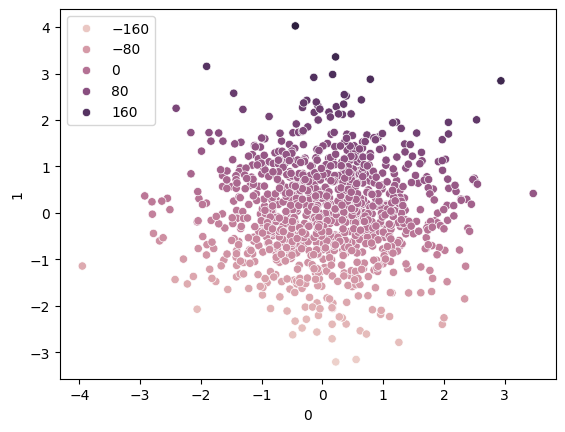

In [17]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y) 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [19]:
X_train

array([[ 0.66329024,  0.91282106],
       [-2.64129339,  0.2551457 ],
       [ 0.3397648 , -0.17670375],
       ...,
       [ 0.14073286,  0.69356317],
       [ 0.56654841,  0.0242629 ],
       [-1.21009341,  0.18314918]])

In [20]:
from sklearn.svm import SVR # support vector regression
svr = SVR(kernel='linear')

In [21]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [25]:
y_pred = svr.predict(X_test)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9999750682330044

    hyperparameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV

params={'kernel':['linear'],
          'C':[1,2,3,4,5,10,120,50,100],
          'gamma':[0.2,1,0.4,0.001,0.003],
          'epsilon':[0.1,0.2,0.3,0.4]
         }

In [28]:
grid = GridSearchCV(SVR(),param_grid=params,cv=5, verbose=3)
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 120, 50, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4],
                         'gamma': [0.2, 1, 0.4, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [29]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.4, kernel=linear;,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 120, 50, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4],
                         'gamma': [0.2, 1, 0.4, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [31]:
grid.best_score_

0.9999723551292796

In [32]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 0.2, 'kernel': 'linear'}

In [33]:
grid.best_estimator_

SVR(C=10, epsilon=0.3, gamma=0.2, kernel='linear')